# Sorting clustering outputs based on diatom magnitude

## Importing

In [29]:
import xarray as xr
import numpy as np
 
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Loading Datasets

In [30]:

diatom_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering_diatom.nc')
clusters0 = diatom_clusters.Clusters_Diatom

ds_variables = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
diatom = ds_variables.Diatom

## Creating supplementary variables

In [31]:
coords = dict(time_counter=ds_variables.time_counter, cluster=np.arange(0,6)) 

clusters = xr.DataArray(coords=coords, dims = ['time_counter', 'cluster'])

for i in tqdm(coords.get('cluster')):

    # Clusters based on the mean diatom value
    clusters[:,i]=diatom.where(clusters0==i).mean(['x','y'])


  0%|          | 0/6 [00:00<?, ?it/s]

## Sorting

In [32]:
# Indexes for sorting
indx = np.argsort(np.argsort(-clusters))

# New clusters, sorted (not the best approach, but it works)

clusters_new = xr.where(clusters0==0, indx[:,0], clusters0)
for i in tqdm(np.arange(1,6)):

    clusters_new = xr.where(clusters0==i, indx[:,i], clusters_new)

  0%|          | 0/5 [00:00<?, ?it/s]

## Validation

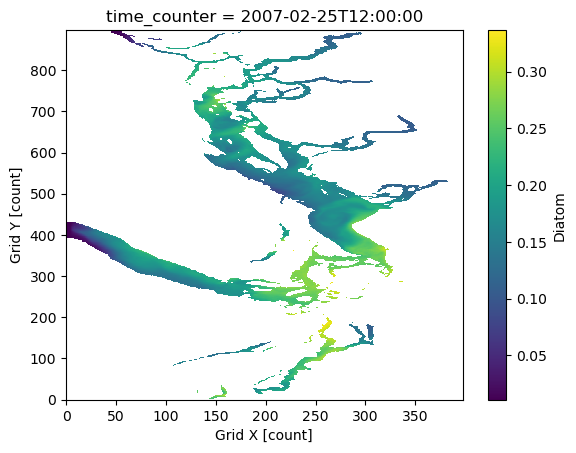

In [33]:
diatom[10].plot()

In [34]:
indx[10]

<xarray.DataArray (cluster: 6)> Size: 48B
array([4, 5, 2, 3, 0, 1])
Coordinates:
    time_counter  datetime64[ns] 8B 2007-02-25T12:00:00
  * cluster       (cluster) int64 48B 0 1 2 3 4 5

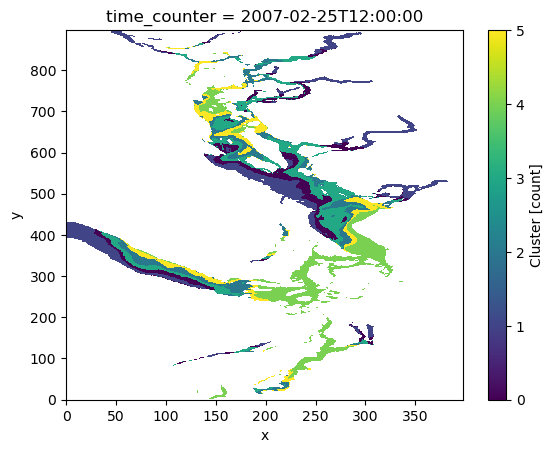

In [35]:
clusters0[10].plot()

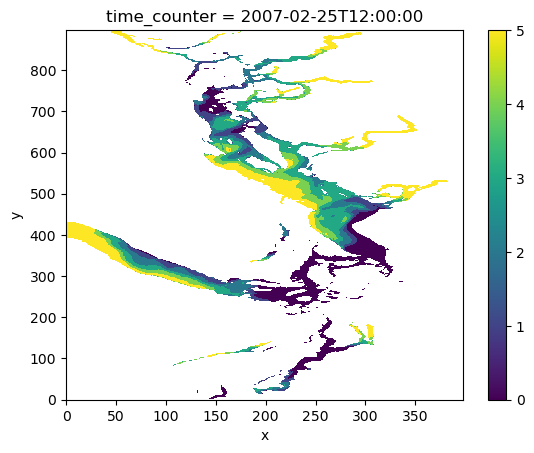

In [36]:
clusters_new[10].plot()

## File Creation

In [37]:
def file_creation(variable, name):

    temp = variable.to_dataset(name=name)
    temp.to_netcdf(path='/data/ibougoudis/MOAD/files/clustering_diatom_sorted.nc', mode='a', encoding={name:{"zlib": True, "complevel": 9}})

In [38]:
# Calling file creation

file_creation(clusters_new, 'Clusters_Diatom_Sorted')